In [10]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import os, glob
from os.path import expanduser

import llops as yp
import matplotlib.pyplot as plt
import numpy as np

yp.config.setDefaultBackend('numpy')
yp.config.setDefaultDatatype('float32')

plt.style.use('/home/deansarah/.config/matplotlib/deblur.mplstyle')

# plt.style.use('deblur')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/deansarah/deblurring/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  from ipykernel import kernelapp as app
/home/deansarah/deblurring/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  from ipykernel import kernelapp as app
/home/deansarah/deblurring/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  from ipykernel import kernelapp as app
/home/deansarah/deblurring/venv/lib/python3.6/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/home/deansarah/deblurring/venv/lib/python3.6/_

In [11]:
# figure_directory = '/home/sarah/Dropbox/deblurring/Phase-Deblurring/journalpaper/figures'
figure_directory = '/home/sarah/Desktop'



In [12]:
def noise_snr(signal, noise_roi=None, signal_roi=None, debug=False):
    """ Calculate the imaging signal to noise ratio (SNR) of a signal """
    # Reference: https://en.wikipedia.org/wiki/Signal-to-noise_ratio_(imaging)

    # Calculate signal mean, using ROI if provided
    signal_mean = yp.mean(signal) if signal_roi is None else yp.mean(signal[signal_roi.slice])

    # Calculate noise standard deviation, using ROI if provided
    signal_std = yp.std(signal) if noise_roi is None else yp.std(signal[noise_roi.slice])

    if debug:
        print('Mean is %g, std is %g' % (yp.scalar(signal_mean), yp.scalar(signal_std)))

    return yp.scalar(signal_mean / signal_std)

# Reconstruction comparisons

Comparing regularization schemes for beads and res target

In [44]:
beads = True
regplot = 'selected'

recon_path = '/home/deansarah/deblurring/datasets/regularized_output/'
if beads:
    filename = 'beads2_line_45ms_coded_raster_100_motion_deblur_2019_02_04_16_45_36_ss=1_regularize=' #[].npz'
else:
    filename = 'res_line_bright_coded_raster_100_motion_deblur_2019_02_05_10_52_50_ss=1_regularize=' #[].npz'

reg_dict = {}
if beads:
#     reg_dict['tv'] = ['[]','[tv1.0e-05]','[tv5.0e-05]','[tv1.0e-04]','[tv5.0e-04]']
    reg_dict['tv'] = ['[]','[tv1.0e-05]','[tv5.0e-05]','[tv1.0e-04]','[tv5.0e-04]']
#     reg_dict['tsvd'] = ['[]','[tsvd1.0e+02]','[tsvd5.0e+02]','[tsvd1.0e+03]','[tsvd5.0e+03]','[tsvd1.0e+04]','[tsvd5.0e+04]','[tsvd1.0e+05]','[tsvd5.0e+05]']
#     reg_dict['tsvd'] = ['[]','[tsvd5.0e+05]','[tsvd1.0e+06]','[tsvd1.0e+07]']
    reg_dict['tsvd'] = ['[]','[tsvd1.0e+06]','[tsvd1.0e+07]']
#     reg_dict['l2'] = ['[]','[l21.0e-05]','[l25.0e-05]','[l21.0e-04]','[l25.0e-04]','[l21.0e-03]','[l21.0e-02]']
    reg_dict['l2'] = ['[]','[l28.0e-03]','[l21.0e-02]']
#     reg_dict['haar_wavelet'] = ['[]','[haar_wavelet1.0e-05]','[haar_wavelet5.0e-05]','[haar_wavelet1.0e-04]','[haar_wavelet5.0e-04]','[haar_wavelet1.0e-03]']
    reg_dict['haar_wavelet'] = ['[]','[haar_wavelet1.0e-04]','[haar_wavelet5.0e-04]','[haar_wavelet1.0e-03]']
    reg_dict['median'] = ['[]','[median1.0e-03]','[median1.0e-02]']
    reg_dict['median_filter'] = ['[]','[median_filter1.0e+00]']
    reg_dict['best_of_each'] = ['[]','[l28.0e-03]','[tsvd1.0e+07]','[haar_wavelet5.0e-04]','[tv5.0e-05]','[median1.0e-02]','[median_filter1.0e+00]']
    reg_dict['selected'] = ['[]','raw','[]','[l21.0e-02]','[median1.0e-02]'] # ,'[median_filter1.0e+00]']#
else:
    reg_dict['tv'] = ['[]','[tv1.0e-05]','[tv5.0e-05]','[tv1.0e-04]','[tv5.0e-04]','[tv1.0e-03]']
    reg_dict['l2'] = ['[]','[l21.0e-05]','[l21.0e-04]','[l21.0e-03]','[l21.0e-02]']
    reg_dict['haar_wavelet'] = ['[]','[haar_wavelet1.0e-05]','[haar_wavelet1.0e-04]','[haar_wavelet1.0e-03]']
    reg_dict['tsvd'] = ['[]','[tsvd1.0e+06]','[tsvd1.0e+07]']

regs = reg_dict[regplot]


<IPython.core.display.Javascript object>


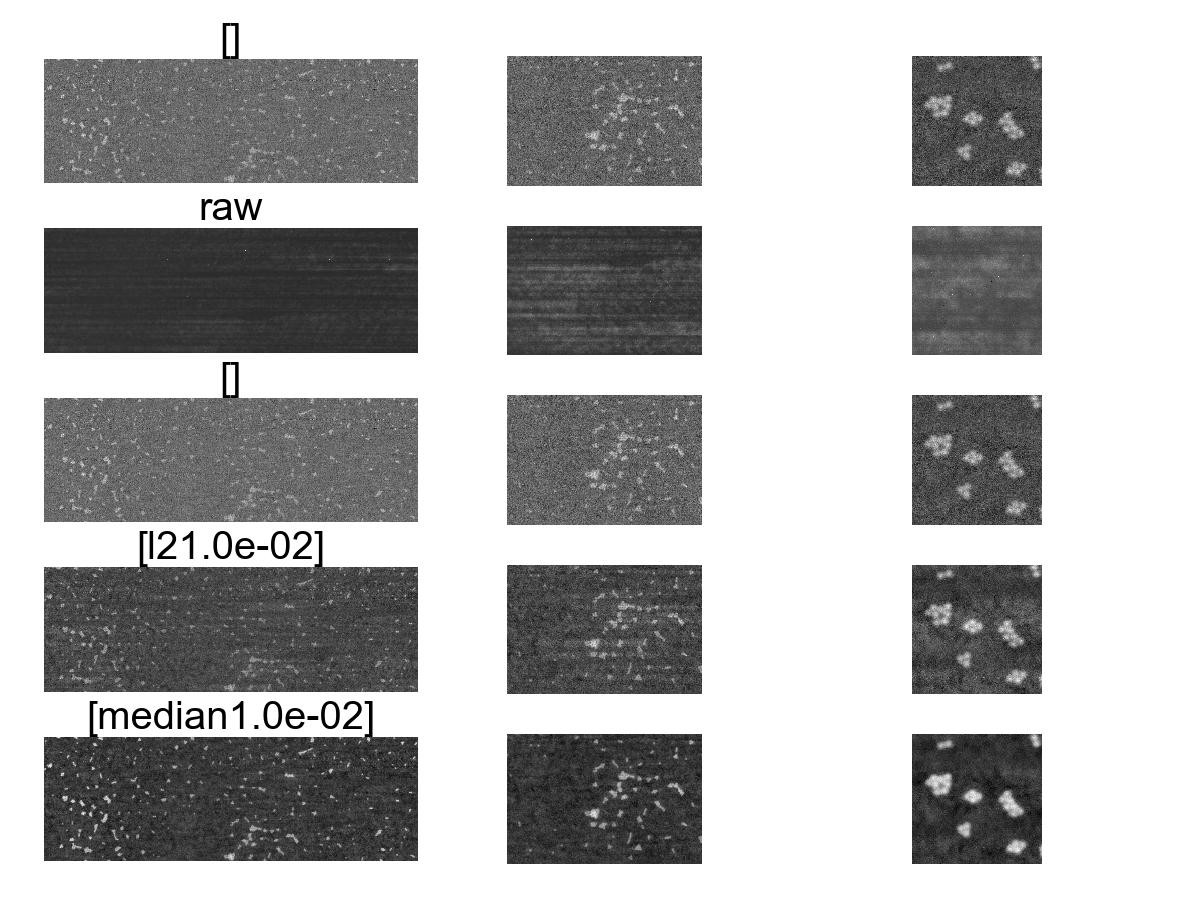

/home/deansarah/deblurring/datasets/regularized_output/comparison_selected_multiscale_beads.png


In [45]:
if beads:
    roi_crop_A = yp.Roi(start=(950, 4000), shape=(512, 1536))
    roi_crop_A2 = yp.Roi(start=(1200, 4500), shape=(400, 600))
    roi_crop_B_0 = yp.Roi(start=(1044-32, 4501), shape=(128, 128))
    roi_crop_B_1 = yp.Roi(start=(1465-32, 4735), shape=(128, 128))
    roi_crop_B_2 = yp.Roi(start=(1178-32+10, 4049+10), shape=(128, 128))
    roi_crop_B = roi_crop_B_2

    min_val = 300
    max_val = 4000
else:
    roi_crop_B_0 = yp.Roi(start=(1000-75,4950-25), shape=(300,300))
    roi_crop_B_1 = yp.Roi(start=(462-75,5228), shape=(300,300))
    roi_crop_B_2 = yp.Roi(start=(1324-75,5350), shape=(300,300))
    archive = np.load(recon_path + filename + regs[0] + '.npz')
    obj = np.real(archive['object_recovered'])
    roi_crop_A = yp.Roi(start=(0,0), shape=obj.shape)
    roi_crop_A2 = roi_crop_B_0
    
    max_val = 20000
    min_val = 0

plt.figure(figsize=(10,1.5*len(regs)))
for i,reg in enumerate(regs):
    if reg == 'raw':
        archive = np.load(recon_path + filename + '[]' + '.npz')
        obj = np.real(archive['y'])
    else:
        archive = np.load(recon_path + filename + reg + '.npz')
        obj = np.real(archive['object_recovered'])
    
    plt.subplot(len(regs),3,3*i+1)
    plt.imshow(obj[roi_crop_A.slice], cmap='gray')
    plt.axis('off')
#     plt.clim((min_val, max_val))
#     roi_crop_A.draw(plt.gca(), c='b')
    plt.title(reg)
    
    plt.subplot(len(regs),3,3*i+2)
    plt.imshow(obj[roi_crop_A2.slice], cmap='gray')
    plt.axis('off')
#     plt.clim((min_val, max_val))
    if beads:
#         (roi_crop_B - roi_crop_A.start).draw(plt.gca(), c='b')

        plt.subplot(len(regs),3,3*i+3)
        plt.imshow(obj[roi_crop_B.slice], cmap='gray')
        plt.axis('off')
#         plt.clim((min_val, max_val))
plt.tight_layout()
tag = 'beads' if beads else 'res'
savepath = recon_path+'comparison_{}_multiscale_{}.png'.format(regplot,tag)
print(savepath)

## SNR Comparisons

<IPython.core.display.Javascript object>


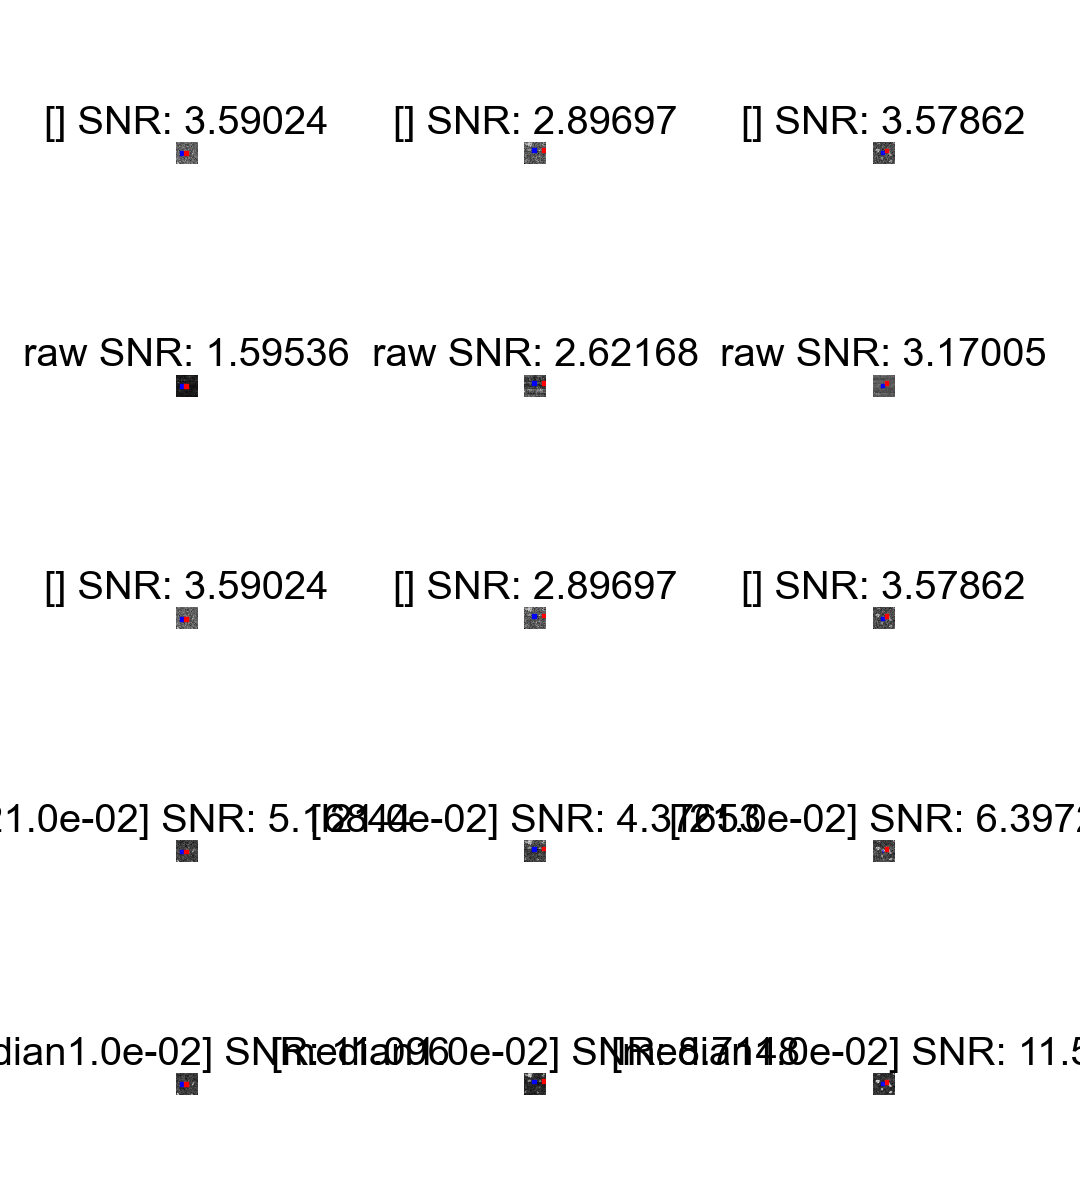

/home/deansarah/deblurring/datasets/regularized_output/comparison_selected_snr_beads.png


In [49]:
plt.figure(figsize=(9,2*len(regs)))
roi_list = (roi_crop_B_0, roi_crop_B_1, roi_crop_B_2)

snrs = {reg:[] for reg in regs}

if beads:
    signal_roi_list = (yp.Roi(start=(60,29), shape=(10,10)), yp.Roi(start=(44,54), shape=(10,10)), yp.Roi(start=(60,55), shape=(5,5)))
    noise_roi_list = (yp.Roi(start=(60,57), shape=(10,10)), yp.Roi(start=(42,108), shape=(10,10)), yp.Roi(start=(45,75), shape=(10,10)))
    mean_bg_value = 378
else:
    noise_roi_list = (yp.Roi(start=(193, 175), shape=(10,10)), yp.Roi(start=(101,140), shape=(15,15)), yp.Roi(start=(100,226), shape=(10,10)))
    signal_roi_list = (yp.Roi(start=(190,135), shape=(25,25)), yp.Roi(start=(100,38), shape=(25,25)), yp.Roi(start=(100,190), shape=(25,25)))
    mean_bg_value = 0

subfig_counter = 1
for i,reg in enumerate(regs):
    if reg == 'raw':
        archive = np.load(recon_path + filename + '[]' + '.npz')
        obj = np.real(archive['y'])
    else:
        archive = np.load(recon_path + filename + reg + '.npz')
        obj = np.real(archive['object_recovered'])
    for index, (roi, signal_roi, noise_roi) in enumerate(zip(roi_list, signal_roi_list, noise_roi_list)):
        obj_crop = obj[roi.slice] - mean_bg_value
        snr_obj = noise_snr(obj_crop, signal_roi=signal_roi, noise_roi=noise_roi)
        snrs[reg].append(snr_obj)


        plt.subplot(len(regs),len(roi_list), subfig_counter)
        plt.imshow(obj_crop, cmap='gray')
        plt.axis('off')
        signal_roi.draw(plt.gca(), c='b')
        noise_roi.draw(plt.gca(), c='r')
        plt.title(reg+' SNR: %g' % snr_obj)
        subfig_counter+=1

plt.tight_layout()
tag = 'beads' if beads else 'res'
savepath = recon_path+'comparison_{}_snr_{}.png'.format(regplot,tag)
print(savepath)

In [50]:
snrs

{'[]': [3.5902362490402546,
  2.8969672258882015,
  3.57861774083812,
  3.5902362490402546,
  2.8969672258882015,
  3.57861774083812],
 'raw': [1.59536039319768, 2.62168226722507, 3.170052603147209],
 '[l21.0e-02]': [5.168440580337563, 4.376532319778936, 6.397197806393358],
 '[median1.0e-02]': [11.095968242476863,
  8.714804903174114,
  11.551139620694451]}

In [42]:
roi_crop_B.shape

(128, 128)

In [103]:
import matplotlib.patches as patches



# Creating images for figure

<IPython.core.display.Javascript object>


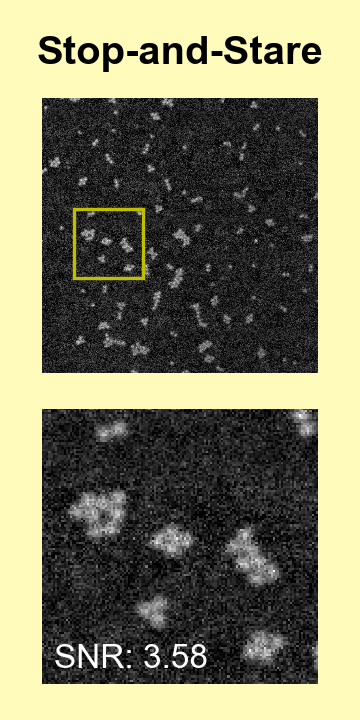

<IPython.core.display.Javascript object>


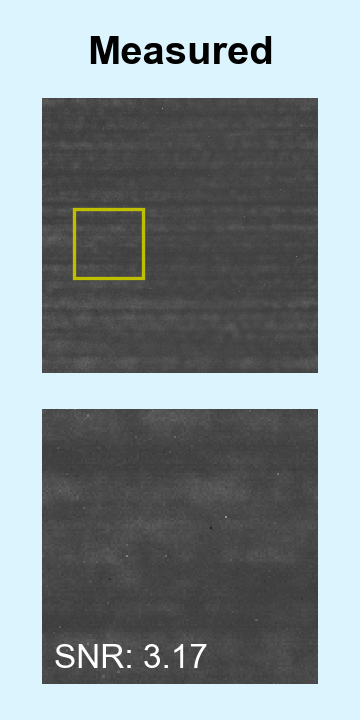

<IPython.core.display.Javascript object>


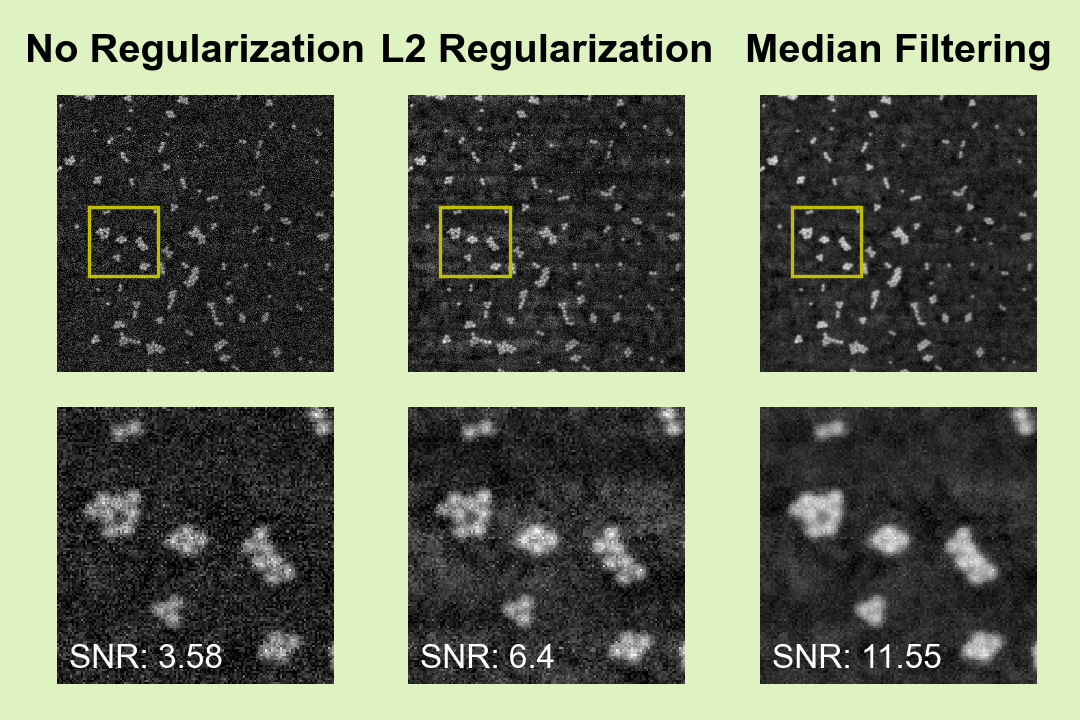

In [123]:
if beads:
    roi_crop_A = yp.Roi(start=(950, 4000), shape=(512, 512))
    roi_crop_B_0 = yp.Roi(start=(1044-32, 4501), shape=(128, 128))
    roi_crop_B_1 = yp.Roi(start=(1465-32, 4735), shape=(128, 128))
    roi_crop_B_2 = yp.Roi(start=(1178-32+10, 4049+10), shape=(128, 128))
    roi_crop_B = roi_crop_B_2
    roi_B_A = yp.Roi(start=(1156-950, 4059-4000), shape=roi_crop_B.shape)
    
    min_val = 300
    max_val = 4000
else:
    assert False
    
titles = ['Stop-and-Stare', 'Measured', 'No Regularization', 'L2 Regularization', 'Median Filtering']
# is it okay to have different clim?
clims = [(-100, 3500),(5, 1500),(-100, 3500),(200, 1500),
         (-10, 2500)]
facecolors = ['#fffbbaff', '#dbf4fdff'] + ['#dff2c2ff']*3
figure_directory = '/home/deansarah/Dropbox/deblurring/Phase-Deblurring/journalpaper/figures/'



for i,reg in enumerate(regs):
    if i < 2:
        fig = plt.figure(figsize=(3,6))
        fig.set_facecolor(facecolors[i])
        ax = plt.subplot(2,1,1)
    if i == 2:
        fig = plt.figure(figsize=(9,6))
        fig.set_facecolor(facecolors[i])
    if i >= 2:
        ax = plt.subplot(2,len(regs)-2,i+1-2)
    if reg == 'raw':
        archive = np.load(recon_path + filename + '[]' + '.npz')
        obj = np.real(archive['y'])
    else:
        archive = np.load(recon_path + filename + reg + '.npz')
        obj = np.real(archive['object_recovered'])

    plt.imshow(obj[roi_crop_A.slice], cmap='gray')
    plt.axis('off')
#     plt.clim((min_val, max_val))
    roi_B_A.draw(plt.gca(), c='y')
    ax.set_title(titles[i], pad=20, fontweight='bold')
    plt.clim(clims[i])
    
    if i < 2:
        ax = plt.subplot(2,1,2)
    if i >= 2:
        ax = plt.subplot(2,len(regs)-2,len(regs)-2+i+1-2)
    plt.imshow(obj[roi_crop_B.slice], cmap='gray')
    plt.axis('off')
    plt.text(5,120,'SNR: ' + str(np.round(snrs[reg][-1],2)),color='w')
    plt.clim(clims[i])
#   plt.clim((min_val, max_val))
    plt.tight_layout()
    plt.savefig(figure_directory + 'fig_regularization{}.pdf'.format(i), facecolor=facecolors[i])

In [92]:
figure_directory = '/home/deansarah/Dropbox/deblurring/Phase-Deblurring/journalpaper/figures/'
plt.savefig(figure_directory + 'fig_regularization.pdf')